# PyTorch (2.0) Sample

https://pytorch.org/get-started/locally/

- Dataset
  - load_digits (sklearn.datasets)

In [1]:
from torch import nn, optim
import torch

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader, TensorDataset

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# Load dataset
DIGITS = load_digits()

X_raw = DIGITS.data
y_raw = DIGITS.target

display(X_raw.shape, y_raw.shape)

(1797, 64)

(1797,)

In [3]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_raw,
    y_raw,
    test_size=0.2
)

In [4]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [5]:
# Create DataLoader for mini-batch processing
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True
)

In [6]:
# Initialize Neural Network model (with 3 layers)
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [7]:
# Loss function and optimizer
lossfun = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [8]:
# Train model
losses = []

for ep in range(100):
    # Training the model using mini-batches
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        out = model(batch_X)

        loss = lossfun(out, batch_y)
        loss.backward()

        optimizer.step()
        losses.append(loss.item())

In [9]:
# Test the model
# Evaluating the model performance on the test set
model.eval()
with torch.no_grad():
    out_test = model(X_test)
    _, pred = torch.max(out_test, 1)
    acc = (pred == y_test).sum().item() / len(y_test)
    print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9583


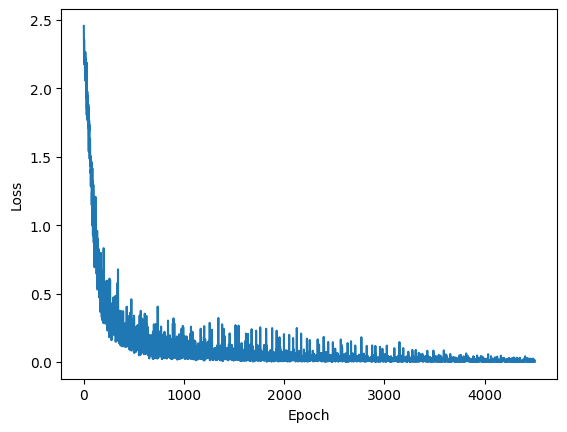

In [10]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()